## Linear, Ridge, Lasso regresijos

In [146]:
# Bibliotekų importavimas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import joblib


In [147]:
# Įkeliame duomenis, bandymai su skirtingais failais

# data = pd.read_csv('data_visi.csv')
data = pd.read_csv('data_visi_v2.csv')
data

,KIEKIS,PIRM_REG_METAI_LT,PIRM_REG_MEN_LT
0,87,2001,1
1,267,2001,2
2,371,2001,3
3,406,2001,4
4,456,2001,5
...,...,...,...
276,11914,2024,1
277,13368,2024,2
278,16130,2024,3
279,17435,2024,4


In [148]:
# Gauname info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   KIEKIS             281 non-null    int64
 1   PIRM_REG_METAI_LT  281 non-null    int64
 2   PIRM_REG_MEN_LT    281 non-null    int64
dtypes: int64(3)
memory usage: 6.7 KB


In [149]:
# Nustatome features and target

# su failu data_visi_v2.csv
X = data[['PIRM_REG_METAI_LT','PIRM_REG_MEN_LT']]

# # su failu data_visi_.csv
# data['PIRM_REG_DATA_LT'] = pd.to_datetime(data['PIRM_REG_DATA_LT'])
# data['PIRM_REG_DATA_LT'] = data['PIRM_REG_DATA_LT'].apply(lambda x: x.timestamp())
# X = pd.DataFrame(data['PIRM_REG_DATA_LT'])

y = data['KIEKIS']

In [150]:
# Padalijame duomenis į mokymo ir testavimo rinkinius
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [151]:
# # 1 variantas --- LinearRegression ----------------------
# poly = PolynomialFeatures(degree=2, include_bias=False)
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.transform(X_test)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_poly)
# X_test_scaled = scaler.transform(X_test_poly)
# # Sukuriame Ridge Regression modelį
# model = LinearRegression()
# param_grid = {'fit_intercept': [True, False],
#               'copy_X': [True, False],
#               'positive': [False, True]}

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
# grid_search.fit(X_train_scaled, y_train)



In [152]:


# 2 variantas --- Ridge regresija ----------------------
# Sukuriame polinominius požymius
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Normalizuojame duomenis
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Sukuriame Ridge Regression modelį
model = Ridge()

# Nustatome hiperparametrų tinklą
param_grid = {'alpha': [0.01, 0.1,0.5, 1, 10, 100],
              'copy_X': [True, False],
              'max_iter': [500, 1000, 1500],
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
              }
##### ValueError: 'lbfgs' solver can be used only when positive=True. Please use another solver.

# Naudojame GridSearchCV geriausiems parametrams rasti
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)



GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10, 100],
                         'copy_X': [True, False], 'max_iter': [500, 1000, 1500],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             scoring='r2')

In [153]:

# # 3 variantas --- Lasso --------------------------
# # variantas Sukuriame su normalizavimu, polinominiais terminais ir Lasso regresija
# poly = PolynomialFeatures(degree=2, include_bias=False)
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.transform(X_test)
# # poly = PolynomialFeatures(degree=1)  # Naudojame tiesinę regresiją
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_poly)
# X_test_scaled = scaler.transform(X_test_poly)
# # Sukuriame Ridge Regression modelį
# model = Lasso()
# # Nustatome hiperparametrų tinklą
# param_grid = {'alpha': [0.01, 0.1,0.5, 1, 10, 100],
#               'fit_intercept': [True, False],
#               'precompute': [False, True],
#               'copy_X': [True, False],
#               'selection': ['cyclic', 'random'],
#               'tol': [0.0001, 0.0002],
#               'warm_start': [False, True],
#               'positive': [False, True],
#               #'random_state': 'Int', RandomState, None,
#               'max_iter': [500, 1000, 1500]}
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
# grid_search.fit(X_train_scaled, y_train)


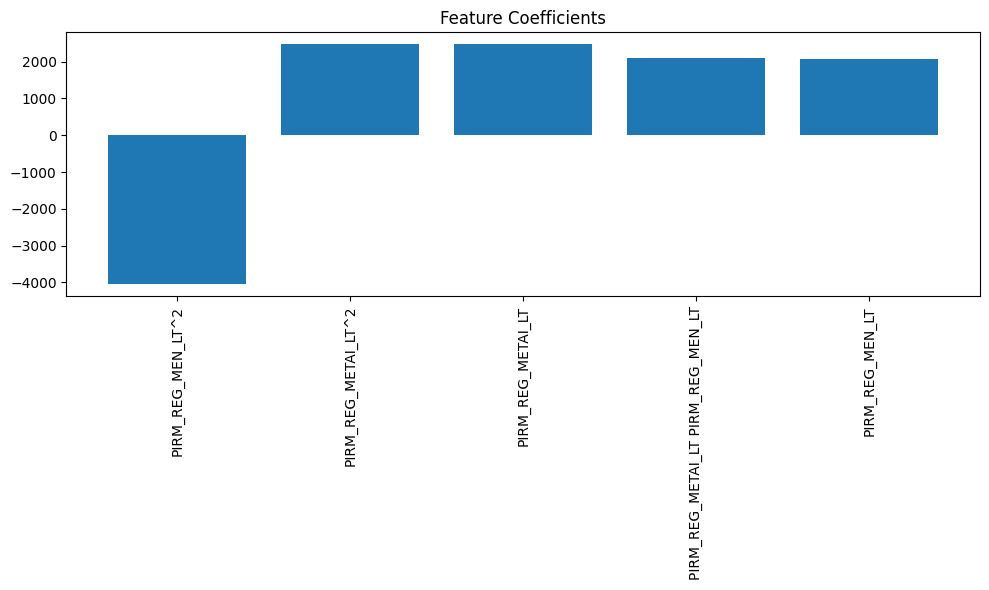

Treniravimo MSE: 2161648.8809042466
Testavimo MSE: 2280778.784769369
Treniravimo R2: 0.9219917887170379
Testavimo R2: 0.9147456146115954
Kryžminės validacijos (cv=5) R2 reikšmės: [0.91384052 0.89281415 0.93485942 0.93622549 0.91233234]
Kryžminės validacijos (cv=5) vidutinis R2: 0.9180143854636891
Kryžminės validacijos (cv=10) R2 reikšmės: [0.93199097 0.88405198 0.84386196 0.93256721 0.92877381 0.93672897
 0.92990776 0.94116806 0.90684795 0.90926982]
Kryžminės validacijos (cv=10) vidutinis R2: 0.9145168506030178
16929.497589880284
Prognozuojamas kiekis *****2025 - 3**** : 16929.497589880284


In [154]:

# Geriausi parametrai
best_params = grid_search.best_params_
# Geriausias modelis
best_model = grid_search.best_estimator_

# Atliekame prognozes
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Vertiname modelį
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Kryžminė validacija su pilnu duomenų rinkiniu
X_combined_poly = poly.transform(pd.concat([X_train, X_test]))
X_combined_scaled = scaler.fit_transform(X_combined_poly)
y_combined = pd.concat([y_train, y_test])

cv_scores_5 = cross_val_score(best_model, X_combined_scaled, y_combined, cv=5, scoring='r2')
cv_scores_10 = cross_val_score(best_model, X_combined_scaled, y_combined, cv=10, scoring='r2')

# polynominių savybių pavadinimai
poly_feature_names = poly.get_feature_names_out(X.columns)

# Koeficientai
coefficients = best_model.coef_
intercept = best_model.intercept_

# Koeficientų vizualizacija
features = X.columns
indices = np.argsort(np.abs(coefficients))[::-1]

# Spausdinimas grafiko
plt.figure(figsize=(10, 6))
plt.title("Feature Coefficients")
plt.bar(range(len(coefficients)), coefficients[indices], align="center")
plt.xticks(range(len(coefficients)), poly_feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

# Rezultatų spausdinimas
print(f'Treniravimo MSE: {train_mse}')
print(f'Testavimo MSE: {test_mse}')
print(f'Treniravimo R2: {train_r2}')
print(f'Testavimo R2: {test_r2}')
print(f'Kryžminės validacijos (cv=5) R2 reikšmės: {cv_scores_5}')
print(f'Kryžminės validacijos (cv=5) vidutinis R2: {cv_scores_5.mean()}')
print(f'Kryžminės validacijos (cv=10) R2 reikšmės: {cv_scores_10}')
print(f'Kryžminės validacijos (cv=10) vidutinis R2: {cv_scores_10.mean()}')

# Išsaugome modelį
joblib.dump(best_model, 'regression_model.pkl')
# Išsaugome PolynomialFeatures ir StandardScaler
joblib.dump(poly, 'poly.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Funkcija prognozei gauti pagal vartotojo įvestis
def predict_kiekis(reg_year, reg_men):
    user_data = pd.DataFrame({
        'PIRM_REG_METAI_LT': [reg_year],
        'PIRM_REG_MEN_LT': [reg_men]
    })
    user_data_poly = poly.transform(user_data)
    user_data_scaled = scaler.transform(user_data_poly)
    predicted_vol = loaded_model.predict(user_data_scaled)
    
    return predicted_vol[0]

# Pavyzdys, kaip vartotojas įveda duomenis
try:
    metai = int(input("Įveskite metus: "))
    menuo = int(input("Įveskite menesi: "))
    kiekis_prediction = predict_kiekis(metai,menuo)
    print(kiekis_prediction)
    if metai == 0:
        print("Baigiam darba.")
    else:
        kiekis_prediction = predict_kiekis(metai,menuo)
        print(f"Prognozuojamas kiekis *****{metai} - {menuo}**** :", kiekis_prediction)
except ValueError:
    print("Įvesta neteisinga reikšmė. Bandykite dar kartą.")



In [155]:
# Su failu data_visi_v2.csv

# LinearRegression
# Treniravimo MSE: 2140075.414054056
# Testavimo MSE: 2320780.0517408564
# Treniravimo R2: 0.9227703182807531
# Testavimo R2: 0.9132503869932114
# Kryžminės validacijos (cv=5) R2 reikšmės: [0.91511972 0.88795115 0.93546983 0.93410916 0.91092121]
# Kryžminės validacijos (cv=5) vidutinis R2: 0.9167142127628448
# Kryžminės validacijos (cv=10) R2 reikšmės: [0.93306917 0.88674581 0.84278595 0.92946359 0.92833692 0.93804815
#  0.92341149 0.94277432 0.90403238 0.90750464]
# Kryžminės validacijos (cv=10) vidutinis R2: 0.9136172410097908
# 17324.006782610162
# Prognozuojamas kiekis *****2025 - 3**** : 17324.006782610162

# RIDGE
# Treniravimo MSE: 2161541.6312995027
# Testavimo MSE: 2280840.3624398108
# Treniravimo R2: 0.9219956590726266
# Testavimo R2: 0.9147433128686635
# Kryžminės validacijos (cv=5) R2 reikšmės: [0.91384372 0.89279084 0.93485952 0.93619851 0.91233035]
# Kryžminės validacijos (cv=5) vidutinis R2: 0.9180045870634546
# Kryžminės validacijos (cv=10) R2 reikšmės: [0.93198635 0.88406483 0.84386005 0.93256199 0.92875685 0.93673633
#  0.92983394 0.94117628 0.90683023 0.909251  ]
# Kryžminės validacijos (cv=10) vidutinis R2: 0.9145057844745164
# 16930.56358084819
# Prognozuojamas kiekis *****2025 - 3**** : 16930.56358084819

# LASSO
# Treniravimo MSE: 2162630.6213272153
# Testavimo MSE: 2279961.2628177702
# Treniravimo R2: 0.9219563602924605
# Testavimo R2: 0.9147761731786912
# Kryžminės validacijos (cv=5) R2 reikšmės: [0.91396255 0.89270096 0.934887   0.93618052 0.91228644]
# Kryžminės validacijos (cv=5) vidutinis R2: 0.9180034932435592
# Kryžminės validacijos (cv=10) R2 reikšmės: [0.93216411 0.88390484 0.8435898  0.93245098 0.92887234 0.93671531
#  0.92991878 0.94121977 0.9069945  0.90890677]
# Kryžminės validacijos (cv=10) vidutinis R2: 0.914473719524102
# 16916.79084780535
# Prognozuojamas kiekis *****2025 - 3**** : 16916.79084780535


# RIDGE su daugiau hiperparametrų
# Treniravimo MSE: 2161648.8809042466
# Testavimo MSE: 2280778.784769369
# Treniravimo R2: 0.9219917887170379
# Testavimo R2: 0.9147456146115954
# Kryžminės validacijos (cv=5) R2 reikšmės: [0.91384052 0.89281415 0.93485942 0.93622549 0.91233234]
# Kryžminės validacijos (cv=5) vidutinis R2: 0.9180143854636891
# Kryžminės validacijos (cv=10) R2 reikšmės: [0.93199097 0.88405198 0.84386196 0.93256721 0.92877381 0.93672897
#  0.92990776 0.94116806 0.90684795 0.90926982]
# Kryžminės validacijos (cv=10) vidutinis R2: 0.9145168506030178
# 16929.497589880284
# Prognozuojamas kiekis *****2025 - 3**** : 16929.497589880284




#---------------------------------------------------------
# Su failu data_visi.csv (metai-men vienas stulpelis)

# LinearRegression 
# Treniravimo MSE: 3012704.111712922
# Testavimo MSE: 3197089.332343936
# Treniravimo R2: 0.8912794483157506
# Testavimo R2: 0.8804943785513294
# Kryžminės validacijos (cv=5) R2 reikšmės: [0.88579049 0.86069062 0.9038609  0.90541829 0.87710113]
# Kryžminės validacijos (cv=5) vidutinis R2: 0.8865722846867629
# Kryžminės validacijos (cv=10) R2 reikšmės: [0.90462395 0.85476753 0.8161308  0.89591118 0.89387611 0.90701531
#  0.89737811 0.91304018 0.85207509 0.88802696]
# Kryžminės validacijos (cv=10) vidutinis R2: 0.8822845214183447

# RIDGE
# Treniravimo MSE: 3014057.5406842222
# Testavimo MSE: 3202136.9889357947
# Treniravimo R2: 0.8912306066310152
# Testavimo R2: 0.8803056996389929
# Kryžminės validacijos (cv=5) R2 reikšmės: [0.88633249 0.86152951 0.90413135 0.90583819 0.87692217]
# Kryžminės validacijos (cv=5) vidutinis R2: 0.8869507433570074
# Kryžminės validacijos (cv=10) R2 reikšmės: [0.90532642 0.85485461 0.81710176 0.89695191 0.89399757 0.90728924
#  0.89727724 0.91398406 0.85151027 0.88860391]
# Kryžminės validacijos (cv=10) vidutinis R2: 0.8826896983963272

# LASSO
# Treniravimo MSE: 3013977.055233252
# Testavimo MSE: 3193820.569522794
# Treniravimo R2: 0.8912335111388286
# Testavimo R2: 0.8806165632924179
# Kryžminės validacijos (cv=5) R2 reikšmės: [0.88662306 0.86257359 0.90425968 0.90598144 0.8772106 ]
# Kryžminės validacijos (cv=5) vidutinis R2: 0.8873296758939915
# Kryžminės validacijos (cv=10) R2 reikšmės: [0.9041741  0.85467525 0.81571812 0.89335465 0.8935952  0.9068193
#  0.89714945 0.91253451 0.85289939 0.88769122]
# Kryžminės validacijos (cv=10) vidutinis R2: 0.8818611182818274